# Random Forest
#### Classification of Leaves
##### Travis Barnett


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.datasets import make_classification


In [11]:
#extract data and create train/test subsets

train = pd.read_csv('train.csv')
X = train.iloc[:,2:]
species = train.iloc[:,1]
y = pd.factorize(species)[0]


xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)



      margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
604  0.003906  0.007812  0.046875  0.029297  0.039062  0.039062  0.027344   
37   0.048828  0.060547  0.003906  0.000000  0.000000  0.142580  0.039062   
652  0.033203  0.101560  0.011719  0.003906  0.001953  0.087891  0.027344   
886  0.031250  0.023438  0.037109  0.023438  0.009766  0.027344  0.058594   
483  0.027344  0.041016  0.048828  0.017578  0.005859  0.041016  0.074219   
158  0.013672  0.015625  0.017578  0.009766  0.011719  0.013672  0.035156   
154  0.000000  0.000000  0.000000  0.021484  0.035156  0.000000  0.007812   
40   0.011719  0.023438  0.091797  0.023438  0.013672  0.027344  0.003906   
310  0.025391  0.064453  0.046875  0.005859  0.000000  0.058594  0.041016   
546  0.000000  0.000000  0.019531  0.015625  0.013672  0.001953  0.013672   
337  0.050781  0.042969  0.011719  0.035156  0.001953  0.048828  0.017578   
523  0.007812  0.005859  0.011719  0.003906  0.013672  0.013672  0.041016   

In [19]:
#search for best parameters using random search

rf = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter=100, cv=3, verbose=2, random_state=0, n_jobs=-1)
rf_random.fit(xTrain, yTrain)

print (rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
/Users/Travis/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.0min finished
/Users/Travis/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}


In [28]:
#Conduct grid search with cross validation based on results from random search

param_grid = {
    'n_estimators': [1000, 1500, 2000, 2500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [80,90,100],
    'bootstrap': [True],
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1,2]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=3,n_jobs=-1, verbose=10)
grid_search.fit(xTrain,yTrain)

best_grid = grid_search.best_estimator_
print(best_grid)
best_grid.fit(xTrain,yTrain)
pred = best_grid.predict(xTest)
grid_accuracy = accuracy_score(pred,yTest)
print('Accuracy = ', grid_accuracy)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 18

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.9494949494949495


In [26]:
#Explore three possible hyperparameters found using grid search

best_param = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
            oob_score=False, random_state=0, verbose=1,
            warm_start=False)

best_param1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0,
            warm_start=False)

best_param2=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0,
            warm_start=False)

best_param.fit(xTrain,yTrain)
pred = best_param.predict(xTest)
train_accuracy = accuracy_score(yTrain, best_param.predict(xTrain))
test_accuracy = accuracy_score(pred, yTest)

best_param1.fit(xTrain,yTrain)
pred1 = best_param1.predict(xTest)
train_accuracy1 = accuracy_score(yTrain, best_param1.predict(xTrain))
test_accuracy1 = accuracy_score(pred1, yTest)

best_param2.fit(xTrain,yTrain)
pred2 = best_param2.predict(xTest)
train_accuracy2 = accuracy_score(yTrain, best_param2.predict(xTrain))
test_accuracy2 = accuracy_score(pred2, yTest)

print("1: Test accuracy", test_accuracy, "Train Accuracy: ",train_accuracy)
print("2: Test accuracy", test_accuracy1, "Train Accuracy: ",train_accuracy1)
print("3: Test accuracy", test_accuracy2, "Train Accuracy: ",train_accuracy2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   12.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.6s finished


1: Test accuracy 0.9444444444444444 Train Accuracy:  1.0
2: Test accuracy 0.9494949494949495 Train Accuracy:  1.0
3: Test accuracy 0.9545454545454546 Train Accuracy:  1.0


In [27]:
#Explore accuracy using default RF hyperparameters

default_param = RandomForestClassifier()
default_param.fit(xTrain,yTrain)
def_pred = default_param.predict(xTest)
def_accuracy = accuracy_score(def_pred,yTest)
print('Default train accuracy', accuracy_score(yTrain, default_param.predict(xTrain)))
print('Default test accuracy ', def_accuracy)

Default train accuracy 1.0
Default test accuracy  0.8383838383838383


/Users/Travis/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9545454545454546
Feature ranking:
1. feature 47 (0.009877)
2. feature 136 (0.008910)
3. feature 2 (0.008909)
4. feature 54 (0.008200)
5. feature 5 (0.008032)
6. feature 112 (0.007722)
7. feature 79 (0.007679)
8. feature 186 (0.007601)
9. feature 80 (0.007560)
10. feature 12 (0.007524)
11. feature 140 (0.007492)
12. feature 42 (0.007481)
13. feature 58 (0.007400)
14. feature 128 (0.007382)
15. feature 176 (0.007342)
16. feature 113 (0.007336)
17. feature 40 (0.007324)
18. feature 1 (0.007319)
19. feature 147 (0.007199)
20. feature 133 (0.007136)
21. feature 49 (0.007010)
22. feature 141 (0.006991)
23. feature 129 (0.006963)
24. feature 81 (0.006898)
25. feature 111 (0.006874)
26. feature 78 (0.006822)
27. feature 157 (0.006795)
28. feature 3 (0.006747)
29. feature 110 (0.006742)
30. feature 158 (0.006655)
31. feature 64 (0.006637)
32. feature 0 (0.006632)
33. feature 17 (0.006567)
34. feature 38 (0.006500)
35. feature 169 (0.006473)
36. feature 82 (0.006403)
37. feature 135 (0.006310)

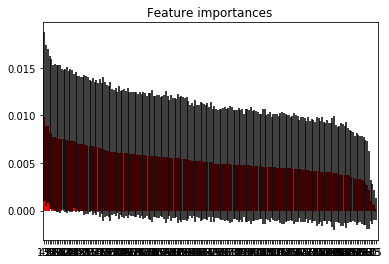

In [29]:
#Explore Feature Importance for a particular model


best_param3=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

best_param3.fit(xTrain,yTrain)
pred3 = best_param3.predict(xTest)
accuracy3 = accuracy_score(pred2, yTest)
print(accuracy3)

importances = best_param3.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_param3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()